# <center> EECS 3401 Project - Job Selection

### Importing Required Libraries

In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Getting the Data 

In [3]:
# Getting the dataset from the github repo 

url = "https://raw.githubusercontent.com/PrabhjeeSingh/MLInterview-Selection-Project/main/DatasetFromKaggle.csv" 

#### Defining DataFrame

In [4]:
data_df = pd.read_csv(url,on_bad_lines='skip')
 
# displaying the contents of the XLSX file
data_df.head()

,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not\n
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,shreej,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,ms6744,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,aswalu,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,aniket,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,2,1,3,1.0,3.0,10,5,7,44,Not Joined


### 3 Graph of EDA

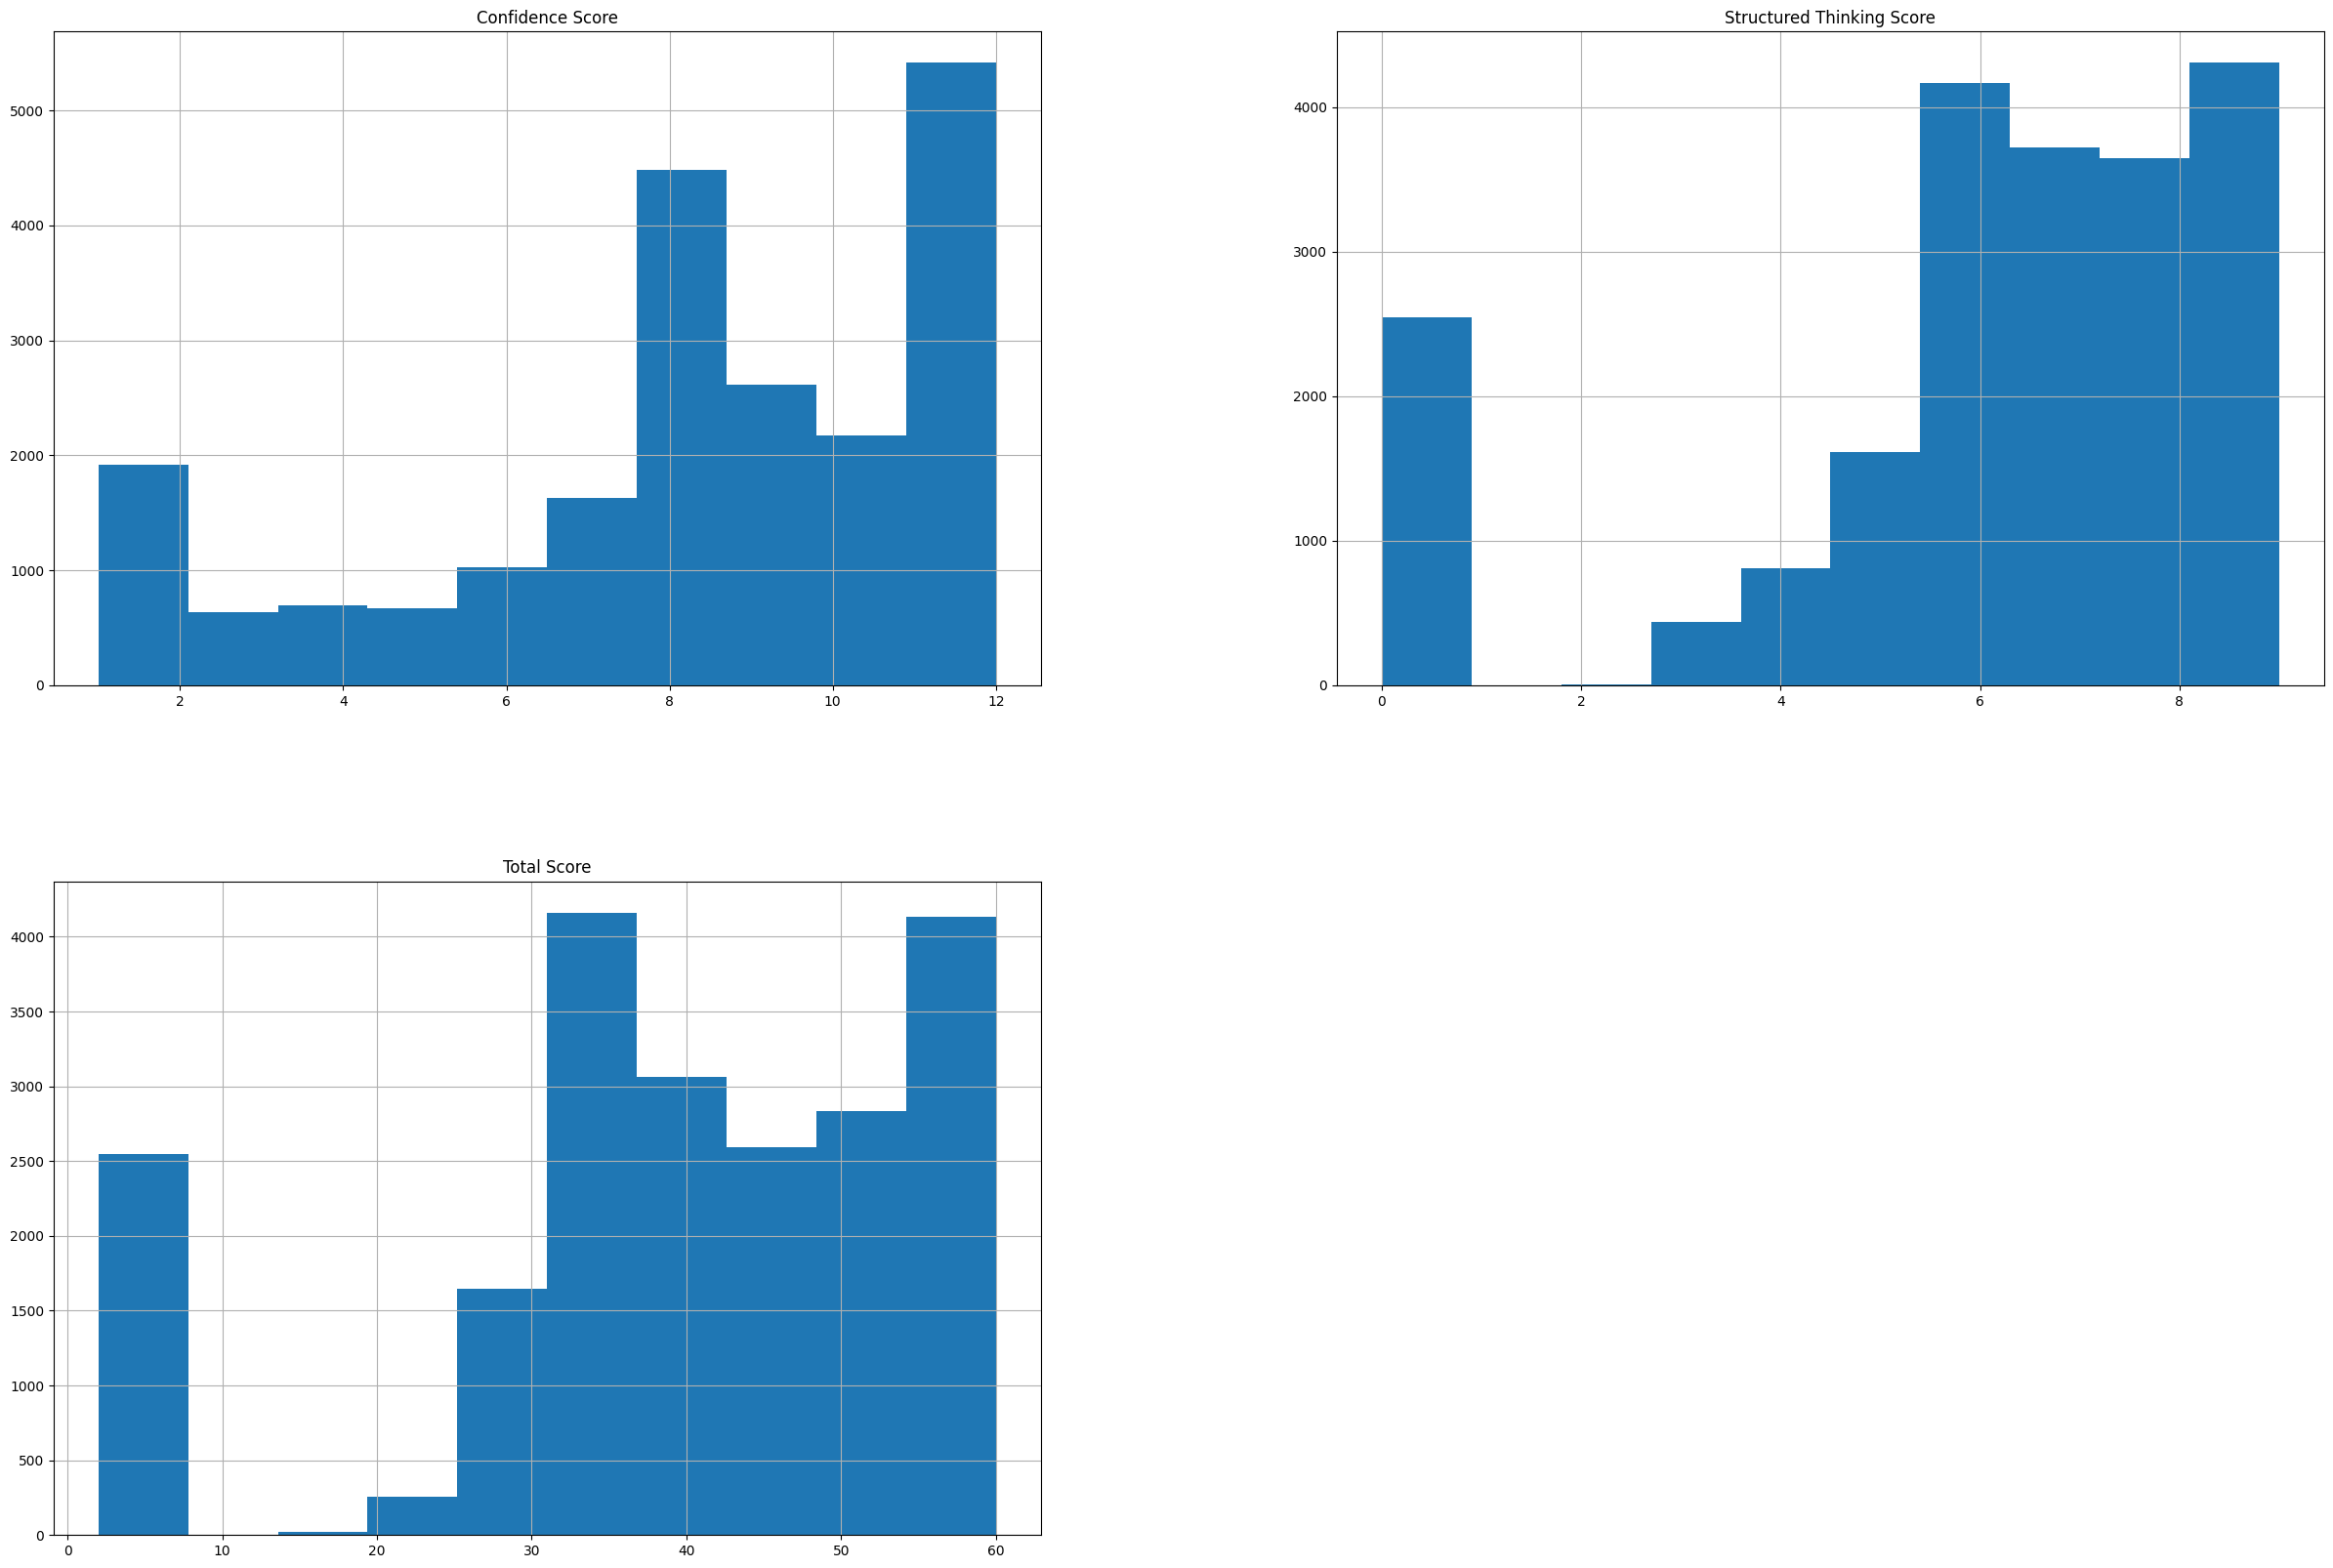

In [5]:
columns = ["Confidence Score", "Structured Thinking Score", "Total Score"]
data_df[columns].hist(figsize=(30, 20))
# data_df.hist(figsize=(30,20))
plt.show()

#### Columns in the dataset

In [6]:
data_df.columns

Index(['Name', 'Age', 'Gender', 'Type of Graduation/Post Graduation',
       'Marital status', 'Mode of interview given by candidate?',
       'Pre Interview Check', 'Fluency in English based on introduction',
       'Confidence based on Introduction (English)',
       'Confidence based on the topic given  ',
       'Confidence Based on the PPT Question',
       'Confidence based on the sales scenario',
       'Structured Thinking (In regional only)',
       'Structured Thinking Based on the PPT Question',
       'Structured Thinking( Call pitch)',
       'Regional fluency based on the topic given  ',
       'Regional fluency Based on the PPT Question',
       'Regional fluency based on the  sales scenario',
       'Does the candidate has mother tongue influence while speaking english.',
       'Has acquaintance in Company and has spoken to him/her before applying?',
       'Candidate Status', 'Last Fixed CTC (lakhs) ', 'Currently Employed',
       'Experienced candidate - (Experience 

## These columns doesn't add any value to the model

In [7]:
# Name, Gender, Marital Status, Mode of Interview, Pre interview check, Last CTC, Currently Employed, Whether joined,
# No. of slides in the presentation doesn't really reflect anything to the candidate selection.

# Rest of the column has already been quantitized from the qualitative comments by the dataset owner.

column_to_drop = [
        'Name', 
        'Gender', 
       'Marital status', 'Mode of interview given by candidate?',
       'Pre Interview Check', 
       'Confidence based on Introduction (English)',
       'Confidence based on the topic given  ',
       'Confidence Based on the PPT Question',
       'Confidence based on the sales scenario',
       'Structured Thinking (In regional only)',
       'Structured Thinking Based on the PPT Question',
       'Structured Thinking( Call pitch)',
       'Regional fluency based on the topic given  ',
       'Regional fluency Based on the PPT Question',
       'Regional fluency based on the  sales scenario',
       'Has acquaintance in Company and has spoken to him/her before applying?',
       'Last Fixed CTC (lakhs) ', 'Currently Employed',    
       'How many slides candidate have submitted in PPT?',
       'Role Location to be given to the candidate', 
       'Comments',
       'RedFlags Comments in Interview',
       'Whether joined the company or not\n'   ,
    'Role acceptance',
    'Experienced Candidate (Nature of work)'
]

### Preparing the Data

#### Dropping the redunctant columns in the dataset

In [8]:
# Dropping the columns 
data_df = data_df.drop(columns=column_to_drop)

#### Columns we are considering from our dataset

In [9]:
data_df.columns

Index(['Age', 'Type of Graduation/Post Graduation',
       'Fluency in English based on introduction',
       'Does the candidate has mother tongue influence while speaking english.',
       'Candidate Status', 'Experienced candidate - (Experience in months)',
       'What was the type of Role?\t',
       'Call-pitch Elements used during the call Sales Scenario',
       'But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)',
       'Let me discuss it with my child',
       'Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.',
       'Interview Verdict', 'Candidate is willing to relocate',
       'Confidence based on Introduction (English).1',
       'Confidence based on the topic given  .1',
       'Confidence Based on the PPT Question.1',
       'Confidence based on the sales scenario.1',
       'Structured Thinking (In regio

In [10]:
data_df.head()

,Age,Type of Graduation/Post Graduation,Fluency in English based on introduction,Does the candidate has mother tongue influence while speaking english.,Candidate Status,Experienced candidate - (Experience in months),What was the type of Role?\t,Call-pitch Elements used during the call Sales Scenario,"But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)",Let me discuss it with my child,...,Structured Thinking (In regional only).1,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score
0,25,Masters in data science,Able to speak sentences in a clear/coherent wa...,No,Experienced in non client facing(equal to or m...,6-11.99 Months,Fresher,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,...,2,3,2,1,1.0,1.0,11,7,3,42
1,29,BSc or MSc,Able to speak sentences in a clear/coherent wa...,No,Lateral(2021 and before with (less than 6 mont...,Fresher(<6 months),Fresher,"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,...,3,3,3,3,3.0,3.0,12,9,9,60
2,27,B.E / B-Tech,Able to speak sentences in a clear/coherent wa...,Yes,Fresher(only 2022 grad),Fresher(<6 months),Individual Contributor,"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,...,3,3,3,3,1.0,3.0,10,9,7,52
3,22,B.E / B-Tech,Able to speak sentences in a clear/coherent wa...,No,Fresher(only 2022 grad),Fresher(<6 months),Fresher,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,...,3,3,3,3,3.0,3.0,12,9,9,60
4,22,BA/MA,Taking gaps while speaking due to lack of cont...,No,Fresher(only 2022 grad),Fresher(<6 months),Fresher,None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,...,2,2,1,3,1.0,3.0,10,5,7,44


## Removing Empty Values 

In [11]:
# Check for Empty Values
data_df.isna().sum()

Age                                                                                                                                                     0
Type of Graduation/Post Graduation                                                                                                                      0
Fluency in English based on introduction                                                                                                                0
Does the candidate has mother tongue influence while speaking english.                                                                                  0
Candidate Status                                                                                                                                     2547
Experienced candidate - (Experience in months)                                                                                                       2547
What was the type of Role?\t                                                

In [12]:
# Delete Empty values
data_df.dropna(subset=["Interview Verdict"], inplace=True)

## Duplicate Values

In [13]:
# Calculate Duplicate Values
data_df.duplicated().sum()
data_df.drop_duplicates()

,Age,Type of Graduation/Post Graduation,Fluency in English based on introduction,Does the candidate has mother tongue influence while speaking english.,Candidate Status,Experienced candidate - (Experience in months),What was the type of Role?\t,Call-pitch Elements used during the call Sales Scenario,"But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)",Let me discuss it with my child,...,Structured Thinking (In regional only).1,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score
0,25,Masters in data science,Able to speak sentences in a clear/coherent wa...,No,Experienced in non client facing(equal to or m...,6-11.99 Months,Fresher,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,...,2,3,2,1,1.0,1.0,11,7,3,42
1,29,BSc or MSc,Able to speak sentences in a clear/coherent wa...,No,Lateral(2021 and before with (less than 6 mont...,Fresher(<6 months),Fresher,"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,...,3,3,3,3,3.0,3.0,12,9,9,60
2,27,B.E / B-Tech,Able to speak sentences in a clear/coherent wa...,Yes,Fresher(only 2022 grad),Fresher(<6 months),Individual Contributor,"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,...,3,3,3,3,1.0,3.0,10,9,7,52
3,22,B.E / B-Tech,Able to speak sentences in a clear/coherent wa...,No,Fresher(only 2022 grad),Fresher(<6 months),Fresher,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,...,3,3,3,3,3.0,3.0,12,9,9,60
4,22,BA/MA,Taking gaps while speaking due to lack of cont...,No,Fresher(only 2022 grad),Fresher(<6 months),Fresher,None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,...,2,2,1,3,1.0,3.0,10,5,7,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21248,30,BSc or MSc,Able to speak sentences in a clear/coherent wa...,No,Experienced in client facing(equal to or more ...,24-29.99 Months,Individual Contributor,"Introduction (Self Intro,Company Name), Purpos...",Urgency by creating counsellor Hype,Anticipation of objection from child's end:,...,3,2,3,1,1.0,3.0,12,8,5,50
21251,25,B.E / B-Tech,Taking gaps while speaking due to lack of cont...,No,Experienced in client facing(equal to or more ...,36-47.99 Months,Team Handling,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...,...,2,2,3,3,3.0,3.0,10,7,9,52
21252,31,B.ARC,Able to speak sentences in a clear/coherent wa...,No,Experienced in client facing(equal to or more ...,48+ Months,Individual Contributor,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,...,3,3,3,3,3.0,3.0,12,9,9,60
21253,26,B.E / B-Tech,Able to speak sentences in a clear/coherent wa...,No,Experienced in non client facing(equal to or m...,12-17.99 Months,Individual Contributor,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:,...,3,3,3,3,3.0,3.0,11,9,9,58


#### Configuring the values of Interview Verdict

In [14]:
data_df['Interview Verdict'].value_counts()

Interview Verdict
Select               9607
Reject               4250
Borderline Select    3500
Premium Select       1197
Borderline Reject     150
Name: count, dtype: int64

###  Combining the final result to the interview selection or rejection

In [15]:
data_df.loc[:,'Interview Verdict']=data_df['Interview Verdict'].replace({"Borderline Select":"Select",
                                                                        "Premium Select":"Select",
                                                                        "Borderline Reject":"Reject" })


In [16]:
data_df['Interview Verdict'].value_counts()

Interview Verdict
Select    14304
Reject     4400
Name: count, dtype: int64

## Data Pipeline Prepration

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:

num_cols = data_df.select_dtypes(include='number').columns.to_list()
cat_cols = data_df.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
cat_cols.remove("Interview Verdict")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

####  Numerical Columns

In [19]:
num_cols

['Confidence based on Introduction (English).1',
 'Confidence based on the topic given  .1',
 'Confidence Based on the PPT Question.1',
 'Confidence based on the sales scenario.1',
 'Structured Thinking (In regional only).1',
 'Structured Thinking Based on the PPT Question.1',
 'Structured Thinking( Call pitch).1',
 'Regional fluency based on the topic given  .1',
 'Regional fluency Based on the PPT Question.1',
 'Regional fluency based on the  sales scenario.1',
 'Confidence Score',
 'Structured Thinking Score',
 'Regional Fluency Score',
 'Total Score']

#### Categorical Columns

In [20]:
cat_cols

['Age',
 'Type of Graduation/Post Graduation',
 'Fluency in English based on introduction',
 'Does the candidate has mother tongue influence while speaking english.',
 'Candidate Status',
 'Experienced candidate - (Experience in months)',
 'What was the type of Role?\t',
 'Call-pitch Elements used during the call Sales Scenario',
 "But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)",
 'Let me discuss it with my child',
 "Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.",
 'Candidate is willing to relocate']

#### Starting the preprocessing 

In [21]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Confidence based on Introduction '
                                  '(English).1',
                                  'Confidence based on the topic given  .1',
                                  'Confidence Based on the PPT Question.1',
                                  'Confidence based on the sales scenario.1',
                                  'Structured Thinking (In regional only).1',
                                  'Stru...
                                  'What was the type of Role?\t',
                                  'Call-pitch Elements used during the call '
                                  'Sales Scenario',
                                  "But, my child's exam are going on now, so "
                                  'we will keep the counselling session after '
                                  'the exams get over.(Time: Favourable pitch: '
                                  'Counsellor hype)',
                                  'Let me discuss it with my child',
                                  'Sir being in education industry I know this '
                                  'is a marketing gimmick and at the end of '
                                  "the day you'll be selling the app.",
                                  'Candidate is willing to relocate'])])

#### Applying the pipline

In [22]:
data_prepared = preprocessing.fit_transform(data_df)
feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

data_prepared

,num__Confidence based on Introduction (English).1,num__Confidence based on the topic given .1,num__Confidence Based on the PPT Question.1,num__Confidence based on the sales scenario.1,num__Structured Thinking (In regional only).1,num__Structured Thinking Based on the PPT Question.1,num__Structured Thinking( Call pitch).1,num__Regional fluency based on the topic given .1,num__Regional fluency Based on the PPT Question.1,num__Regional fluency based on the sales scenario.1,...,"cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._User Base(Stats), Value creation(Nothing comes for free)","cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._User Base(Stats), Value creation(Nothing comes for free), 15 days trial",cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._Value creation(Nothing comes for free),"cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._Value creation(Nothing comes for free), 15 days trial","cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._Value creation(Nothing comes for free), None of the above",cat__Candidate is willing to relocate_No - Want Specific Centre Location Only,cat__Candidate is willing to relocate_Yes - Anywhere Within a City,cat__Candidate is willing to relocate_Yes - Anywhere Within a State,cat__Candidate is willing to relocate_Yes - Anywhere in PAN India,remainder__Interview Verdict
0,1.196442,-0.432248,1.135659,1.163232,-0.618796,1.020009,-0.425104,-1.093311,-1.064232,-1.043819,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Reject
1,1.196442,1.12551,1.135659,1.163232,0.984689,1.020009,1.00573,0.979077,1.023927,1.05979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Reject
2,-0.391006,1.12551,-0.372532,1.163232,0.984689,1.020009,1.00573,0.979077,-1.064232,1.05979,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Select
3,1.196442,1.12551,1.135659,1.163232,0.984689,1.020009,1.00573,0.979077,1.023927,1.05979,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Select
4,-0.391006,1.12551,-0.372532,1.163232,-0.618796,-0.556315,-1.855937,0.979077,-1.064232,1.05979,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Select
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18699,1.196442,1.12551,1.135659,1.163232,0.984689,-0.556315,1.00573,-1.093311,-1.064232,1.05979,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Select
18700,-0.391006,1.12551,-0.372532,1.163232,-0.618796,-0.556315,1.00573,0.979077,1.023927,1.05979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Select
18701,1.196442,1.12551,1.135659,1.163232,0.984689,1.020009,1.00573,0.979077,1.023927,1.05979,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Select
18702,1.196442,1.12551,1.135659,-0.251955,0.984689,1.020009,1.00573,0.979077,1.023927,1.05979,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Select


#### Prepared Columns

In [23]:
data_prepared.columns



Index(['num__Confidence based on Introduction (English).1',
       'num__Confidence based on the topic given  .1',
       'num__Confidence Based on the PPT Question.1',
       'num__Confidence based on the sales scenario.1',
       'num__Structured Thinking (In regional only).1',
       'num__Structured Thinking Based on the PPT Question.1',
       'num__Structured Thinking( Call pitch).1',
       'num__Regional fluency based on the topic given  .1',
       'num__Regional fluency Based on the PPT Question.1',
       'num__Regional fluency based on the  sales scenario.1',
       ...
       'cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._User Base(Stats), Value creation(Nothing comes for free)',
       'cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._User Base(Stats), Value creation(Nothing comes for free), 15 days trial',
       'cat_

#### Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split

X = data_prepared.drop(["remainder__Interview Verdict"],axis=1)
y = data_prepared["remainder__Interview Verdict"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14963, 446) (14963,) (3741, 446) (3741,)


## Feature Importance Comparison
    # Because our data had most categorical values so corr was ineffective

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,
                             random_state=101, max_features=None, min_samples_leaf=30)
rfm.fit(X_train, y_train)

# Get feature importances
feature_importances = rfm.feature_importances_

# Pair feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                                               Feature  Importance
11                      num__Structured Thinking Score    0.569345
3        num__Confidence based on the sales scenario.1    0.132021
401  cat__Sir being in education industry I know th...    0.070890
13                                    num__Total Score    0.058439
442  cat__Candidate is willing to relocate_No - Wan...    0.024572
..                                                 ...         ...
171  cat__Type of Graduation/Post Graduation_PG DIP...    0.000000
170  cat__Type of Graduation/Post Graduation_PG - m...    0.000000
169  cat__Type of Graduation/Post Graduation_PDGM m...    0.000000
168  cat__Type of Graduation/Post Graduation_PDGM A...    0.000000
223  cat__Type of Graduation/Post Graduation_doctor...    0.000000

[446 rows x 2 columns]


In [26]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming you have already fitted the RandomForestClassifier and obtained feature importances

# Set a threshold for feature importance
threshold = 0.01  # You can adjust this threshold as per your requirements

# Filter features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Retain only the selected features in your dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Use the selected features for further analysis or modeling


In [27]:
X_train_selected

,num__Structured Thinking Score,num__Confidence based on the sales scenario.1,cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._Did not answer,num__Total Score,cat__Candidate is willing to relocate_No - Want Specific Centre Location Only,num__Regional fluency based on the sales scenario.1,cat__Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app._None of the above,num__Confidence Score
9044,-1.300749,-0.251955,0.0,-1.147965,0.0,-1.043819,0.0,-0.439778
11264,0.615943,1.163232,0.0,1.318175,0.0,1.05979,0.0,1.414193
3639,-0.022954,-0.251955,0.0,-0.19945,0.0,-1.043819,0.0,0.023715
17122,1.25484,1.163232,0.0,0.749065,0.0,-1.043819,0.0,0.487208
10882,0.615943,-0.251955,0.0,-0.009747,0.0,-1.043819,1.0,0.9507
...,...,...,...,...,...,...,...,...
11284,-0.661851,1.163232,0.0,-0.389153,0.0,1.05979,1.0,0.023715
11964,-0.661851,-0.251955,0.0,-0.578856,0.0,-1.043819,0.0,-0.439778
5390,1.25484,1.163232,0.0,1.507878,0.0,1.05979,0.0,1.414193
860,0.615943,1.163232,0.0,1.128472,1.0,1.05979,1.0,0.9507


## Training and Evaluating 3 ML models

### Model 1 (Random Forest Classifier)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier (n_estimators=70, oob_score=True, n_jobs=-1,
random_state=101, max_features = None, min_samples_leaf = 30)
rfm. fit(X_train_selected, y_train)
y_predict=rfm.predict(X_test_selected)

print (classification_report(y_test, y_predict))


              precision    recall  f1-score   support

      Reject       0.77      0.63      0.69       907
      Select       0.89      0.94      0.91      2834

    accuracy                           0.86      3741
   macro avg       0.83      0.78      0.80      3741
weighted avg       0.86      0.86      0.86      3741



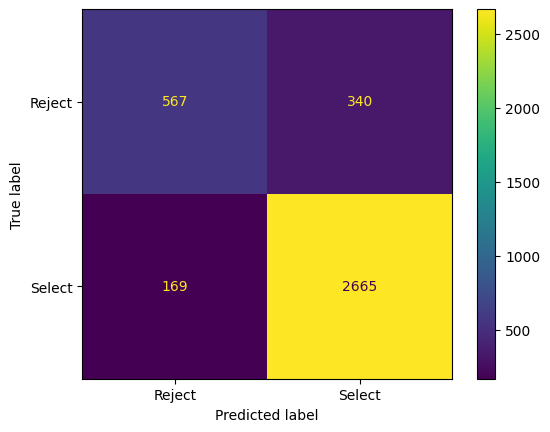

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)


### Model 2 (Naive Bayes Gaussian)

In [31]:

from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
# nb.fit(X_train,y_train)
# y_predict = nb.predict(X_test)
nb.fit(X_train_selected,y_train)
y_predict = nb.predict(X_test_selected)

print (classification_report(y_test, y_predict))




              precision    recall  f1-score   support

      Reject       0.62      0.73      0.67       907
      Select       0.91      0.85      0.88      2834

    accuracy                           0.82      3741
   macro avg       0.76      0.79      0.77      3741
weighted avg       0.84      0.82      0.83      3741



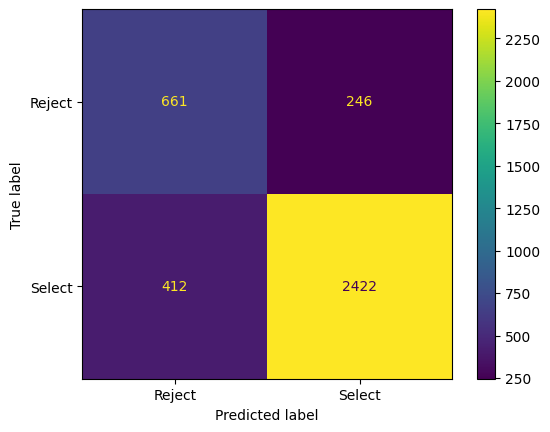

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### Model 3 (Linear)

In [33]:

model_svm = SVC(kernel='linear', C=0.1, gamma=1)

In [42]:

# model_svm.fit(X_train, y_train).values.ravel()
model_svm.fit(X_train_selected, y_train.values.ravel())

SVC(C=0.1, gamma=1, kernel='linear')

In [44]:
y_predict=model_svm.predict(X_test_selected)
print(f'classification_report for C = 0.1')
print (classification_report(y_test, y_predict))

classification_report for C = 0.1
              precision    recall  f1-score   support

      Reject       0.80      0.56      0.65       907
      Select       0.87      0.95      0.91      2834

    accuracy                           0.86      3741
   macro avg       0.83      0.76      0.78      3741
weighted avg       0.85      0.86      0.85      3741



### Plotting 3 graphs for our best performing algorithm: Linear

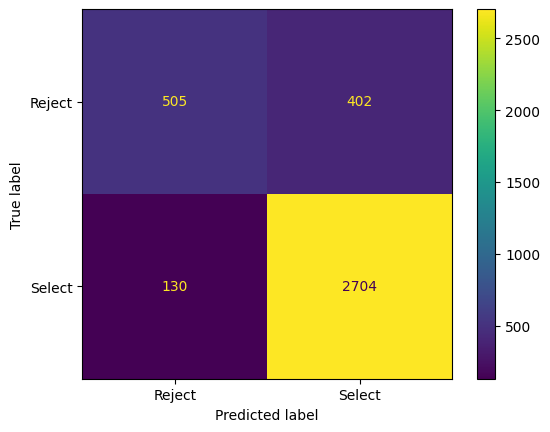

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### Checking if our best performing model is overfitting

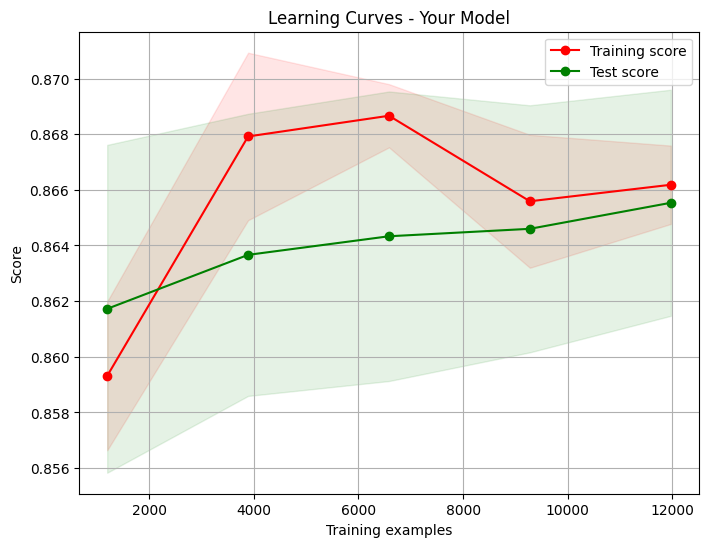

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves - Your Model"
plot_learning_curve(model_svm, title, X_train_selected, y_train, cv=5, n_jobs=-1)

plt.show()


#### Since the line seems to be converging as the data increases we can conclude that our feature selection is correct and model is not overfitting

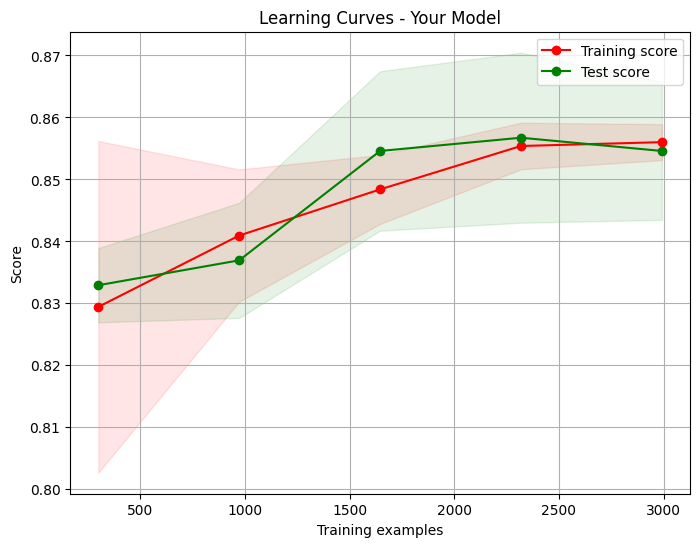

In [47]:
## Comparing on the test data for overfitting

plot_learning_curve(model_svm, title, X_test_selected, y_test, cv=5, n_jobs=-1)

plt.show()

In [61]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
importances_svm = model_svm.coef_[0]

In [64]:
acc = accuracy_score(y_test, y_predict)

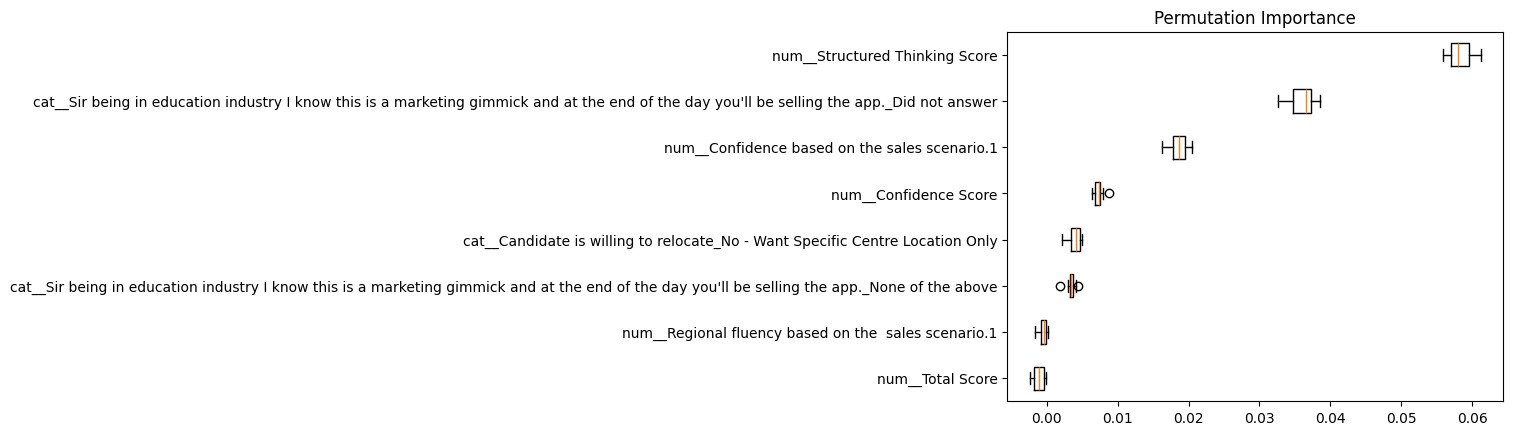

In [96]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Perform permutation importance
result = permutation_importance(model_svm, X_train_selected, y_train, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

# # Print the feature ranking
# print('Feature ranking:')
# for i in range(X_train_selected.shape[1]):
#     # print(f'{X_train_selected.columns[sorted_idx[i]]}: {result.importances_mean[sorted_idx[i]]:.3f}')

# Display a bar plot of the feature importance
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train_selected.columns[sorted_idx])
ax.set_title("Permutation Importance")
# fig.tight_layout()
plt.show()